In [2]:
%matplotlib inline                      

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import misc

In [23]:
pic_face = misc.imread('/home/slou/Documents/M2/semestre1/ML_project/pictures_train/103.jpg')
type(pic_face)      
pic_face.shape, pic_face.dtype

((1024, 683, 3), dtype('uint8'))

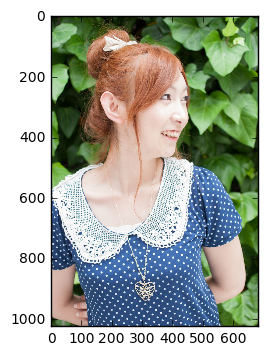

In [24]:
plt.imshow(pic_face)

Features :
    background impact : 
    angle impact :
        given by angle feature
    position impact :
        using rule of the third, each picture split in 9 cases according to their size, we could use each of this case as a feature. Use the face detection and position of the face features to create another feature to say in which cases it is. Try of this after
    sharpness impact : determining sharpnesse using contrast ?
    exposure impact : 
    expression impact : using the expression feature but maybe need to compute with other feature such as colors (colorful = joy ?)
    
    
    
    Data features are given in % not in absolute

In [5]:
pic_features = pd.read_csv('/home/slou/Documents/M2/semestre1/ML_project/facial_features_train.csv')
result = pd.read_csv('/home/slou/Documents/M2/semestre1/ML_project/output_train.csv', sep =";")

pic_features.head()

,ID,detection score,x0,y0,width,height,left_eye_x,left_eye_y,right_eye_x,right_eye_y,...,angle_impact_p,angle_impact_n,position_impact_p,position_impact_n,sharpness_impact_p,sharpness_impact_n,exposure_impact_p,exposure_impact_n,expression impact_p,expression_impact_n
0,1,0.989140,0.286370,0.194149,0.586600,0.437185,0.352257,0.342082,0.528909,0.334524,...,0.500000,0.000000,0.000000,0.000000,0.666667,0.0,0.166667,0.000000,0.166667,0.000000
1,2,0.999978,0.622779,0.104573,0.319961,0.479114,0.721203,0.248519,0.859511,0.250956,...,0.000000,0.000000,0.428571,-0.142857,0.857143,0.0,0.285714,0.000000,0.714286,0.000000
2,3,0.999749,0.141922,0.224155,0.418156,0.549069,0.278366,0.419830,0.445683,0.364625,...,0.166667,0.000000,0.333333,0.000000,1.000000,0.0,0.333333,-0.166667,0.333333,0.000000
3,4,0.999806,0.499818,0.382715,0.485564,0.551305,0.656774,0.516767,0.847100,0.584977,...,0.166667,-0.166667,0.166667,-0.333333,1.000000,0.0,0.166667,0.000000,0.166667,0.000000
4,5,0.996076,0.275462,0.301032,0.440068,0.315859,0.383386,0.393272,0.560128,0.401940,...,0.000000,-0.166667,0.000000,0.000000,0.500000,0.0,0.333333,0.000000,0.333333,-0.166667


In [25]:
pic_features.iloc[1026]

ID                                        1027
detection score                       0.996573
x0                                     0.28903
y0                                    0.319593
width                                 0.343921
height                                0.296867
left_eye_x                            0.377427
left_eye_y                            0.411992
right_eye_x                           0.521538
right_eye_y                            0.41093
left_of_left_eyebrow_x                0.325724
left_of_left_eyebrow_y                0.381031
right_of_left_eyebrow_x               0.415285
right_of_left_eyebrow_y               0.384227
left_of_right_eyebrow_x               0.486697
left_of_right_eyebrow_y               0.384072
right_of_right_eyebrow_x              0.572246
right_of_right_eyebrow_y              0.380282
midpoint_between_eyes_x                0.45148
midpoint_between_eyes_y               0.411188
nose_tip_x                             0.45254
nose_tip_y   

In [34]:
pic_features.x0.unique()

array([ 0.28637022,  0.62277856,  0.14192215, ...,  0.2807503 ,
        0.41293033,  0.16432089])

In [26]:
result.iloc[1026]

ID        1027
TARGET      17
Name: 1026, dtype: int64

In [14]:
x_selection_position = pic_features.ix[:,'x0':'right_eye_y']
y_position_impact = pic_features[["position_impact_p", "position_impact_n"]].sum(axis=1)

In [15]:
y_position_impact.head()

0    0.000000
1    0.285714
2    0.333333
3   -0.166667
4    0.000000
dtype: float64

In [16]:
list(x_selection_position)
#compute middle of face 
x_selection_position['middle_x'] = x_selection_position['x0'] + x_selection_position['width']/2
x_selection_position['middle_y'] = x_selection_position['y0'] + x_selection_position['height']/2

#compute distance from the first third point
#sqrt((x2 - x1)**2 + (y2 - y1)**2 )
#math.hypot(x2 - x1, y2 - y1)

#Line distance
x_selection_position['distance_x_a'] = abs(x_selection_position['middle_x'] - 0.33)
x_selection_position['distance_y_a'] = abs(x_selection_position['middle_y'] - 0.33)
x_selection_position['distance_x_b'] = abs(x_selection_position['middle_x'] - 0.67)
x_selection_position['distance_y_c'] = abs(x_selection_position['middle_y'] - 0.67)

#Eyes position distance to the top third
x_selection_position['left_eye_top_y'] = abs(x_selection_position['left_eye_y'] - 0.33)
x_selection_position['right_eye_top_y'] = abs(x_selection_position['right_eye_y'] - 0.33)


x_selection_position.head()

,x0,y0,width,height,left_eye_x,left_eye_y,right_eye_x,right_eye_y,middle_x,middle_y,distance_x_a,distance_y_a,distance_x_b,distance_y_c,left_eye_top_y,right_eye_top_y
0,0.286370,0.194149,0.586600,0.437185,0.352257,0.342082,0.528909,0.334524,0.579670,0.412742,0.249670,0.082742,0.090330,0.257258,0.012082,0.004524
1,0.622779,0.104573,0.319961,0.479114,0.721203,0.248519,0.859511,0.250956,0.782759,0.344129,0.452759,0.014129,0.112759,0.325871,0.081481,0.079044
2,0.141922,0.224155,0.418156,0.549069,0.278366,0.419830,0.445683,0.364625,0.351000,0.498689,0.021000,0.168689,0.319000,0.171311,0.089830,0.034625
3,0.499818,0.382715,0.485564,0.551305,0.656774,0.516767,0.847100,0.584977,0.742600,0.658367,0.412600,0.328367,0.072600,0.011633,0.186767,0.254977
4,0.275462,0.301032,0.440068,0.315859,0.383386,0.393272,0.560128,0.401940,0.495496,0.458961,0.165496,0.128961,0.174504,0.211039,0.063272,0.071940


In [17]:
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_selection_position, y_position_impact, train_size=0.8, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_selection_position, result['TARGET'], train_size=0.8, random_state=0)
print("Nb d'échantillons d'apprentissage :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation :    {}".format(X_test.shape[0]))

Nb d'échantillons d'apprentissage :  8000
Nb d'échantillons de validation :    2000


In [136]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
               
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)

# Chargement d'une mesure standard de performance
from sklearn.metrics import mean_squared_error

# accuracy : mean square error
print("Accuracy       : ", mean_squared_error(y_test, y_pred))


Accuracy       :  17.2120001908


(array([   18.,    16.,    28.,    71.,   203.,  1480.,   120.,    40.,
           17.,     7.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

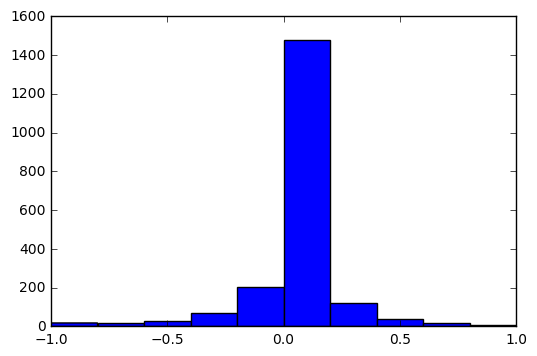

In [108]:
#plt.scatter(X_test, y_pred)
#plt.hist(y_pred, bins=10)
plt.hist(y_test, bins=10)



In [127]:
test = y_position_impact[(y_position_impact <= -0.5)]
test.head()

43    -0.714286
51    -0.500000
64    -1.000000
125   -0.500000
132   -0.500000
dtype: float64

In [132]:
test2 = result[(result['TARGET'] >= 24)]
test2.head()

,ID,TARGET
2129,2130,24
2768,2769,24
6304,6305,24
6781,6782,24
9111,9112,24


In [36]:
pic_features[(pic_features['x0'] == 'None')]


/home/slou/anaconda3/lib/python3.5/site-packages/pandas/core/ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison